In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

#### Section 1

Building the model

##### Step 1



In [2]:
#step 1
#function to setup the square grid of size N*N and with n 1s and n 2s
def initialise_grid(N, n):
    line_array = np.zeros(N*N)  #make a line array with the same amount of numbers than the final matrix
    for i in range(n): #run over the line array
        line_array[i] = 1 #add the n amounts of 1s 
        line_array[i+n] = 2 #add the n amounts of 2s
    random.shuffle(line_array) #shuffle the line array
    square_matrix = np.reshape(line_array, (N, N)) #transpose my line array to a square matrix 
    return square_matrix

###### Test Case



In [3]:
grid = initialise_grid(4, 5)

# A 4 by 4 array with exactly 5 `1`s and 5 `2`s
print(grid)

[[0. 2. 2. 0.]
 [2. 0. 1. 1.]
 [1. 0. 2. 1.]
 [0. 2. 1. 0.]]


##### Step 2



In [4]:
#count the number of neighbours which are the same as the center
def neighbours_same(x, i ,j):
    N,M = np.shape(x)         #count the dimensions of the array
    sub_array = x[max(i-1,0):min(i+2, N),max(j-1,0):min(j+2, M)] 
        # create a 3x3 sub array around the number of interest, also accounting for the boundaries
    if x[i, j] == 0:
        count = 0
    else: 
        count = np.count_nonzero(sub_array == x[i, j]) -1  
    
#counts the number of the same occurences in the sub.array as the one in the middle and substracting 1 to account for the one in the middle
    return count

###### Test Case



In [5]:
#test cases
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(neighbours_same(x_test, 0, 0))
print(neighbours_same(x_test, 0, 1))
print(neighbours_same(x_test, 1, 0))
print(neighbours_same(x_test, 1, 1))

1
1
0
2


##### Step 3



In [6]:
#step 3
def neighbours_total(x, i, j):
    N,M = np.shape(x)         #count the dimensions of the array
    sub_array = x[max(i-1,0):min(i+2, N),max(j-1,0):min(j+2, M)] #create a 3x3 sub_array around the point of interest x[i, j]

    if x[i, j] == 0:
        count = np.count_nonzero(sub_array != 0) # condition that if the point of interest is 0, the count value becomes the total non zero values around it, because the value in the center will not be counted as it already zero
    else:
        count = np.count_nonzero(sub_array != 0) -1 
        #similar condition however substracting 1 as the count will also include the value in the center

    return count

###### Test Case



In [7]:
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(neighbours_total(x_test, 0, 0))
print(neighbours_total(x_test, 0, 1))
print(neighbours_total(x_test, 1, 0))
print(neighbours_total(x_test, 1, 1))

2
4
5
6


##### Step 4



In [8]:
# step 4

    
def get_dissatisfied_cells(x, f):
    N,N = np.shape(x)  #calculates the dimensions of the array
    dis_array = np.zeros([N, N])  #creates the new array for dissatisfied cells
    for i in range(N): 
        for j in range(N): #runs over the entire array
            total_nonzero = neighbours_total(x, i, j)  #assigns total_nonzero the number of nonzero cells around a particular cell

            total_same = neighbours_same(x, i, j)  #assigns total_same the number of the same cells to a particular cell

            cell_fraction = (total_same/max(1,total_nonzero))  #assigns cell_fraction the correct fraction of the same neighbouring cells 
            
            if x[i, j] == 0: #makes sure the zero cells are not taking into account
                dis_array[i, j]
            else:
                if cell_fraction < f:  #assigns 1 to cells under the threshold f value
                    dis_array[i, j] = 1
                else: 
                    dis_array[i, j] = 0 #assigns 0 to the rest of the cells
            
    
    return dis_array

###### Test Case



In [9]:
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(get_dissatisfied_cells(x_test, 0.4))

[[0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]


##### Step 5



In [10]:
#step 5

def advance(x, f):  #create an new array where all dissatisfied cells go to zero
    N, N = np.shape(x) #finds the dimensions of the array
    result_array = np.zeros([N, N]) #creates a new array of zeros with the same dimensions
    dis_array = get_dissatisfied_cells(x, f) #imports the get_dissatisfied_cells function to match the dissatisfied cells in the new array
    for i in range(N):
        for j in range(N): #runs over the entrie result_array
            if dis_array[i, j] == 0:  #assigns the same value as the original array to satisfied cells
                result_array[i, j] = x[i, j]
            elif dis_array[i, j] ==1: #assigns the value 0 to all dissatisfied cells
                result_array[i, j] = 0 
                
    
    dis_array_2 = np.zeros([N, N]) #create a new array with only 3 and assign the right cells to all zeros and all the dissatisfied cells at the right place
    dis_array_2.fill(3) #fill the array with 3s
    for i in range(N):
        for j in range(N): # run over the entire array 
            if result_array[i ,j] == 0: 
                # when at the same place, the result_array is 0 assign the value of of the original array to the 3s array
                dis_array_2[i, j] = x[i, j]
            else:
                dis_array_2[i, j] = 3 #else keep the value 3
                
    indices = np.where(dis_array_2 != 3) #extract the numbers from the array which are not 3 
    numbers_shuffle = dis_array_2[indices] # create a new 1d array with only the numbers to shuffle (zeros and unsatisfied cells)
    random.shuffle(numbers_shuffle) #shuffle the numbers in the 1d array
    dis_array_2[indices] = numbers_shuffle #reassign the shuffled numbers to right place in the array
    
    #reassign the right shuffled numbes back in to the result array 
    for i in range(N):
        for j in range(N): #run over the results array 
            if result_array[i, j] ==0:
                result_array[i, j] = dis_array_2[i, j] #assign the unsatisfied cells and the zeros cells to a new random unoccupied spot
            else:
                result_array[i, j] = x[i, j] #keep the same values for satisfied cells
    return result_array

###### Test Case



In [11]:
x_test = np.array([[2, 2, 1, 2, 1],
                   [0, 1, 1, 1, 1],
                   [2, 2, 0, 0, 0],
                   [2, 1, 2, 2, 2],
                   [2, 1, 1, 0, 1]])

print(advance(x_test, 0.4))

[[2. 0. 1. 2. 1.]
 [2. 2. 1. 1. 1.]
 [2. 2. 0. 1. 1.]
 [2. 0. 2. 2. 2.]
 [0. 1. 1. 0. 1.]]


##### Step 6



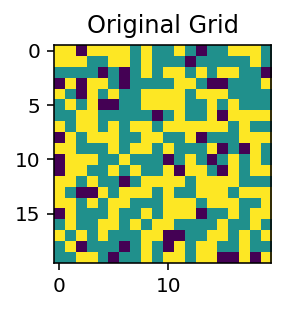

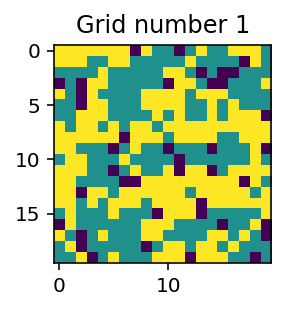

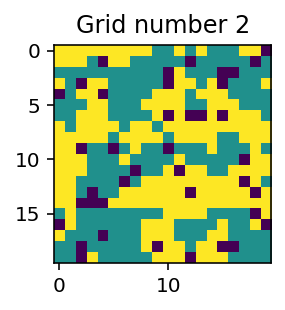

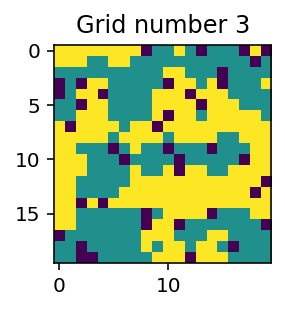

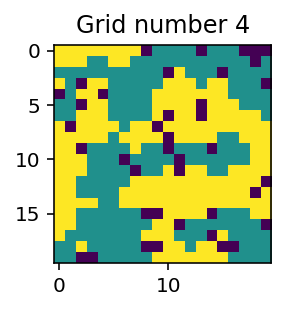

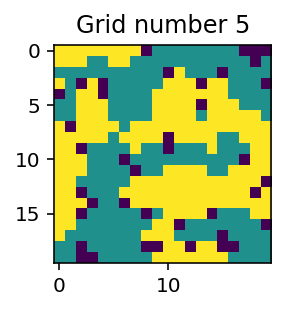

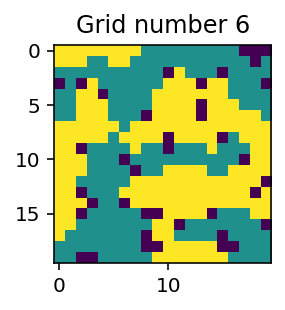

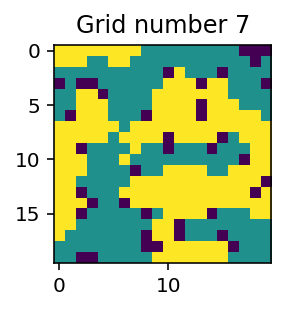

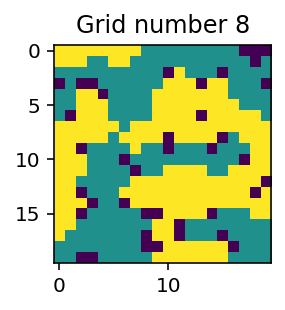

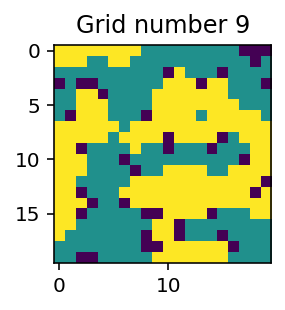

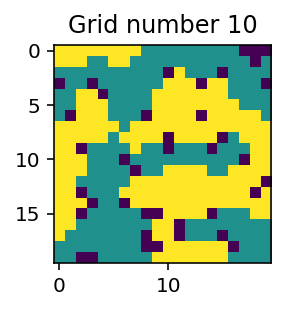

In [12]:
#step 6
grid = initialise_grid(20, 180) # intialising grid of 20x20 with 180 1s and 180 2s and 40 0s
plt.figure(figsize=(2, 2)) #set the figure size to 2,2
plt.imshow(grid) #show the intial grid without iteration
plt.title('Original Grid')
for i in range(10): #loop that plots all the itterations (10)
    grid = advance(grid, 0.4) #set the advance function
    plt.figure(figsize=(2,2)) #set image size
    plt.imshow(grid) #plot grid
    plt.title("Grid number {}".format(i+1)) #set titel to each grid

#### Part 2

This section is aimed at exploring further the functioning of the model. More specifically how changing the key parameters influence the time and the way the grid stabalizes. This is measured by counting after each itteration how many unsatisfied cells there were in the grid. This section is laid out in 3 subsections. First, the effect of having different f-values will be considered. The f value is the parameter which set the threshold percentage of same neighbouring cells to the one considered. A low f value means that the cell is very quickly sattisfied while a very high f value means that the cell will only be satisfied when nearyl all the neighbouring cells should be the same in order for it to be satisfied. The second section will look at the effect of the grid size holding other parameter constante. Finally the last section looks at the percentage of occupied cells holding both amounts of organisms the same (the same number of 1s and 2s).

##### Section 1


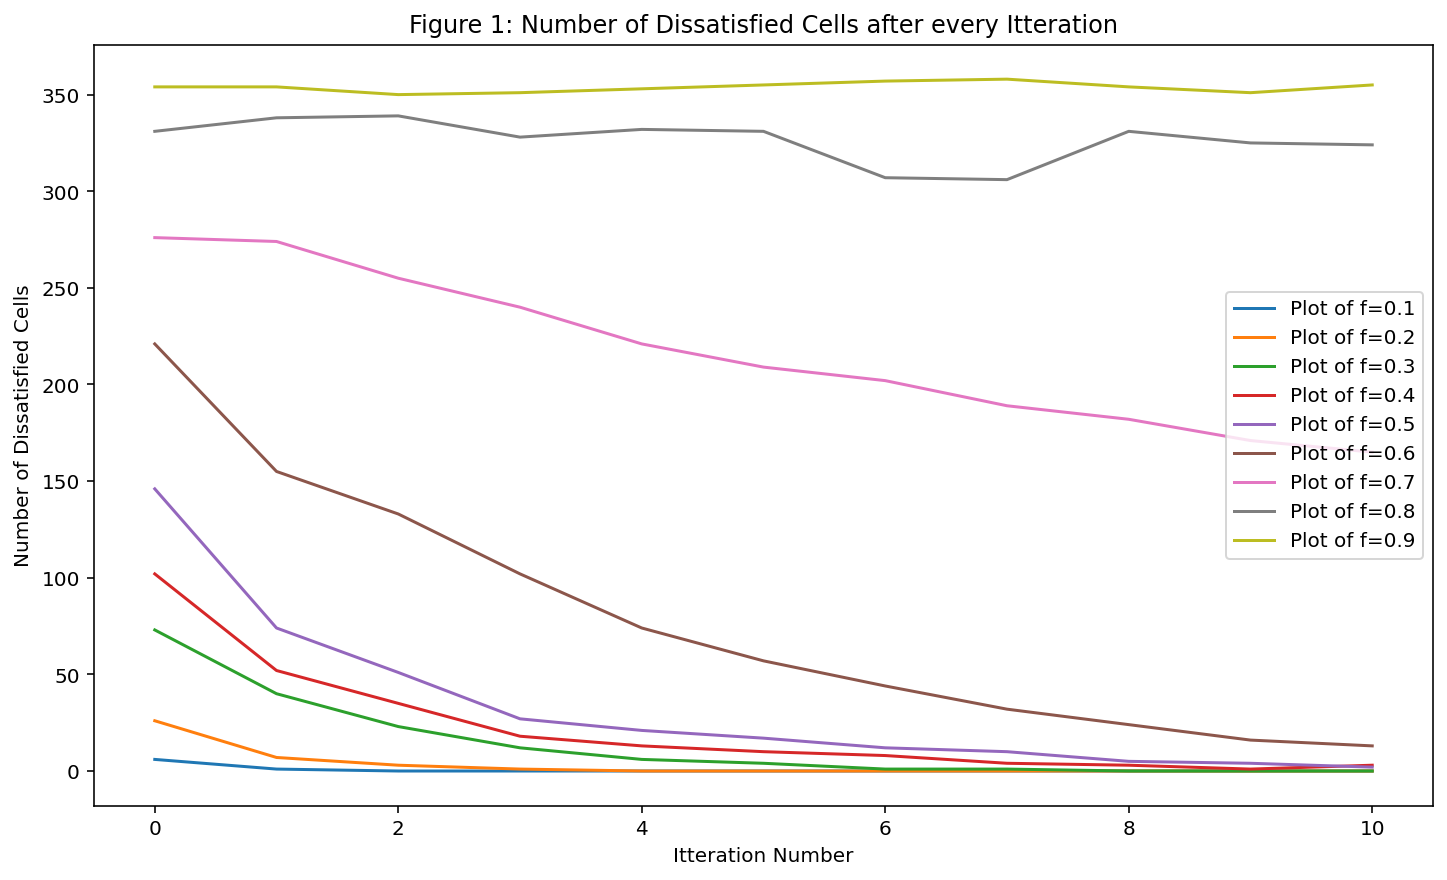

In [13]:
#Plot that shows the evolution of the amount of dissatisfied cells after each iteration for different values of f
def number_dissatisfied_cells(x,f): #function that counts the amount of dissatisfied cells in the grid
    array = get_dissatisfied_cells(x,f) # set an array the same size as the grid
    N, N = np.shape(x)
    total=0
    for i in range(N): 
        for j in range(N):
            total += array[i, j] #loop that adds to a counter every time there is a dissatisfied cell and running over the whole array
    return total 


t= np.linspace(0,10, 11) #sets a line space for the x-axis
originalGrid= initialise_grid(20, 180) #refers back to make a fresh grid every time
diss_array = np.zeros(11) #array of number of dissatisfied cells every time (new iteration)
for f in np.arange(0.1,1,0.1): #loop that plots a new line for all values of f 
    grid = originalGrid
    diss_array[0] = number_dissatisfied_cells(grid, f) #assigns the oringinal grid to the first value
    for i in range(1, 11): #runs over 10 extra iterations
        grid = advance(grid, f)
        diss_array[i] = number_dissatisfied_cells(grid, f) #sets the values of the dissatisfied array for 10 iterations
    plt.plot(t, diss_array, label="Plot of f={}".format(round(f,1))) #plots the plot
    plt.legend(loc='center right')
    plt.title("Figure 1: Number of Dissatisfied Cells after every Itteration")
    plt.xlabel("Itteration Number")
    plt.ylabel("Number of Dissatisfied Cells")
plt.show()



This plot \(figure 1\) shows the evoltion of a grid with parameters of 45% 1s, 45% 2s and a 20 by 20 grid size. It tracks the evolution of the number of dissatisfied cells in this grid after every iteration of the process. It does. that for all values of f. It can be seen in the plot that for values 0.1 to 0.6, the grid nearly every time stabilizes. We can define stablizes by the stage when there are no more dissatisfied cells. For f values 0.7 to 0.9, it is unclear if they will stabilizes at some point in the future. Further exploration is need for this. 


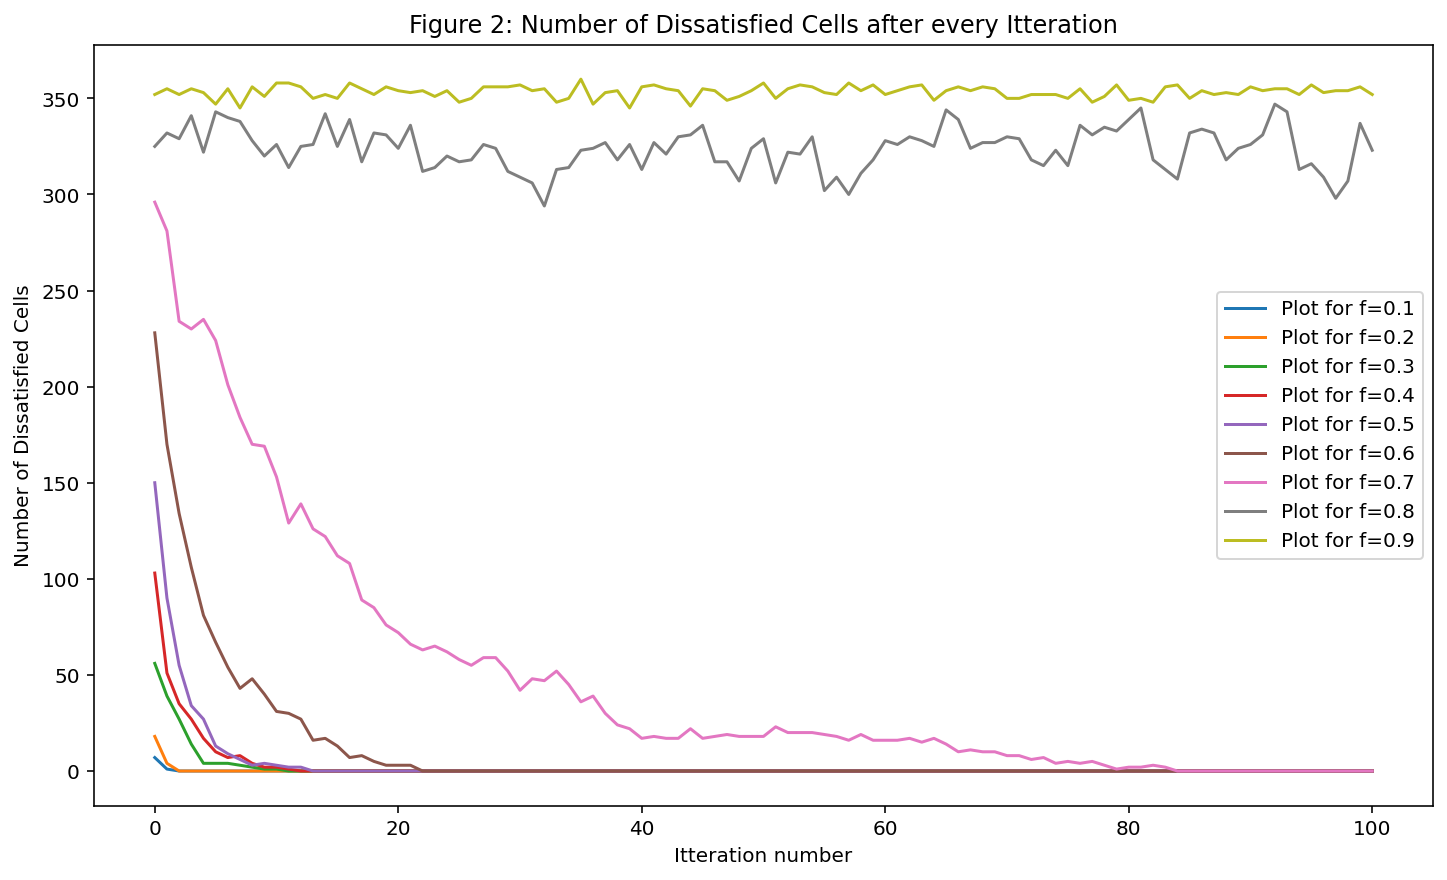

In [14]:
#this is the same code as the cell above, it only produces the plot for 100 iterations of the same grid for all values of f
t= np.linspace(0,100, 101) #setup of linspace of 101 values
originalGrid= initialise_grid(20, 180) #setup the original grid
diss_array = np.zeros(101) #setup array with all dissatisfied cells at every iteration
for f in np.arange(0.1,1,0.1): #runs for all values of f
    grid = originalGrid
    diss_array[0] = number_dissatisfied_cells(grid, f) #set the first value to the original grid
    for i in range(1, 101):
        grid = advance(grid, f)
        diss_array[i] = number_dissatisfied_cells(grid, f) #give the number of dissatisfied cells after each iteration
    plt.plot(t, diss_array, label="Plot for f={}".format(round(f,1))) #plot the plots
    plt.title("Figure 2: Number of Dissatisfied Cells after every Itteration")
    plt.xlabel("Itteration number")
    plt.ylabel("Number of Dissatisfied Cells")
    plt.legend(loc='center right')
plt.show()


Here, the plot \(figure 2\) shows roughly the same data as the one above but for more iterations. It can therefore be seen that for values 0.8 and 0.9, the grid does not seem to ever stabilise. However, for f value 0.7, the plot stabilises after 60 iterations roughly. It is important to note that this data is random and will change after every time the code is ran. It may well be that with some probability, the grids for f values 0.8 and 0.9 stabilize, however we can say with a certain level a certainty that it is very unlikely.


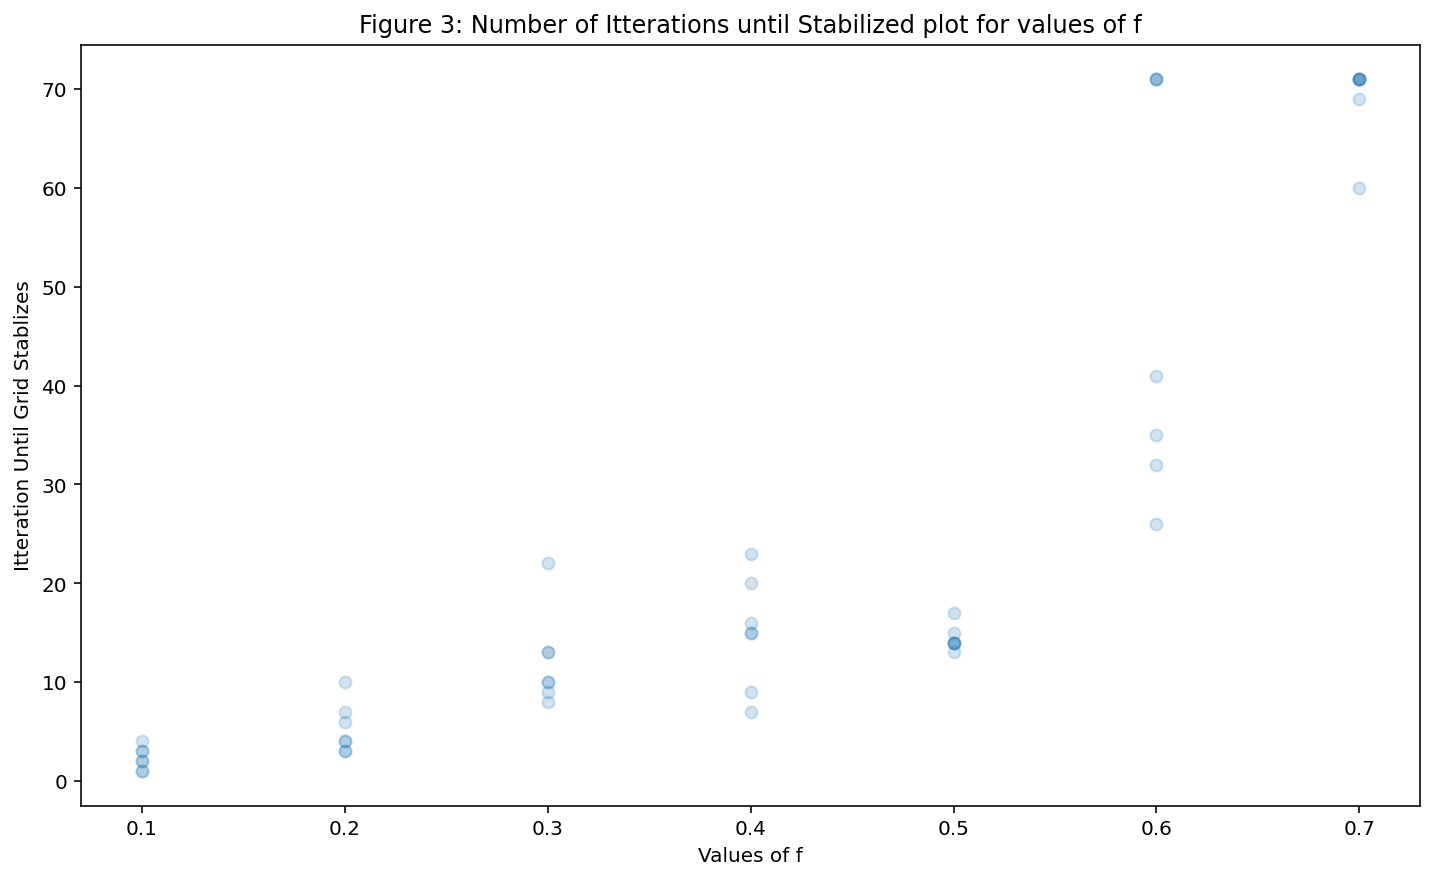

In [15]:
# the section produces a scatter plot of the number of itteration until stablized state for each value of f
def number_of_itterations(N, a, f): #function that returns the number of itterations until stablilization for a grid
    originalGrid = initialise_grid(N, a)
    diss_array = np.zeros(71) # run the itterations 71 times to account for larger values of f
    grid = originalGrid
    diss_array[0] = number_dissatisfied_cells(grid, f) # set the value 0 to the 'un-itterated' grid
    for i in range(1, 71):
        grid = advance(grid, f)
        diss_array[i] = number_dissatisfied_cells(grid, f)
        number_itterations = np.count_nonzero(diss_array != 0) # count all the nonzero elements in the array
    return number_itterations #return the number of nonzero elements in the array which is the equal to the amount of iterations needed for the grid to stabilise

results_list =[] #create an empty list
for f in range(1, 8):
    f = f / 10
    results = [number_of_itterations(20, 180, f) for _ in range(7)] #run the same code 7 times so we can observe a distribution
    results_list.extend(results) #creates one big list with all the results of the loop
results_array = np.array(results_list) #makes to list into an numpy array


t = np.zeros(49) #setup a linspace to match every iteration with the right value of f
t[0:7] = 0.1
t[7:14] = 0.2
t[14:21] = 0.3
t[21:28] = 0.4
t[28:35] = 0.5
t[35:42] = 0.6
t[42:49] = 0.7
plt.scatter(t, results_array, alpha = 0.2) #plots the big array against the linspace
plt.title("Figure 3: Number of Itterations until Stabilized plot for values of f")
plt.xlabel("Values of f")
plt.ylabel("Itteration Until Grid Stablizes")
plt.show()

This plot \(figure 3\) shows the number of iterations needed until stabilisation for each value of f ran 7 times each time. We can see a distribution of different random results for each value of f. The values 0.1 to 0.7 were the only ones found to stabilise at some point so they are the only ones displayed here. We can clearly see that smaller values of f stabilise quicker, however not in a linear manner. Also, some values very much overlap, like 0.4 and 0.5 for example. The fact that it cuts of at 71 itterations is to reduce the time taken to run this section of code. 

##### Section 2



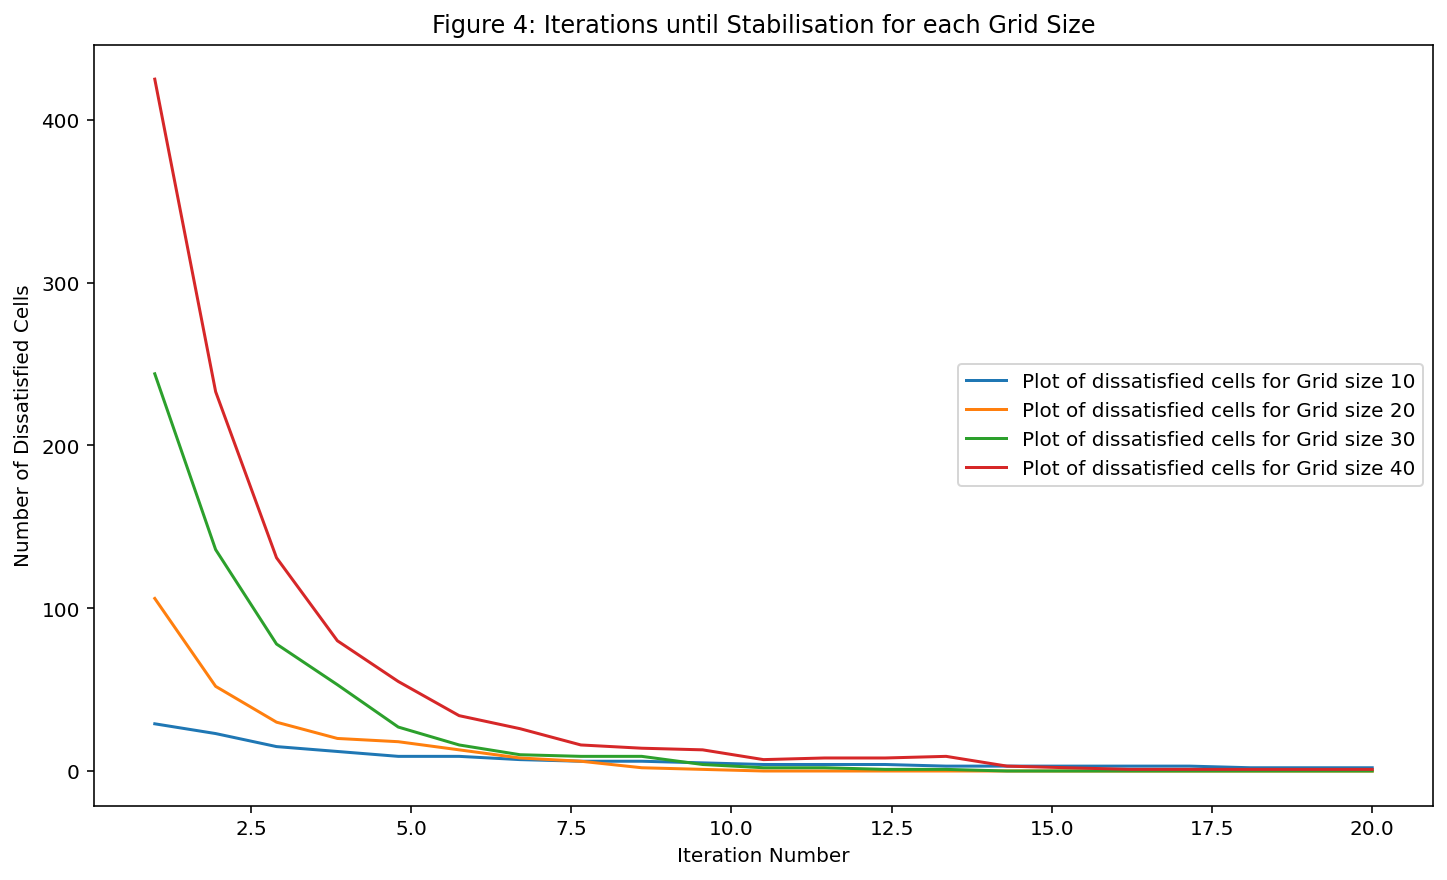

In [16]:
#First looking at the effect of grid size with keeping the value of f constant with a 90% full of organism 

t= np.linspace(1,20, 21) #setup a linspace corresponding to 20 iterations
diss_array = np.zeros(21) #setup an array for the dissatifed cells
a = np.array([45, 180, 405, 720, 1125]) #setting the range in the loop at occupation values 90% for each grid size
for N in range(1,5,1): #run over all grid-sizes
    j = N*10
    originalGrid= initialise_grid(j, a[N-1]) #initialise a new grid each time with the right dimensions
    grid = originalGrid
    diss_array[0] = number_dissatisfied_cells(grid, 0.4)
    for i in range(1, 21): #run over the 20 iterations
        grid = advance(grid, 0.4)
        diss_array[i] = number_dissatisfied_cells(grid, 0.4) #match the right values for every iterations
    plt.plot(t, diss_array, label="Plot of dissatisfied cells for Grid size {}".format(j))
    plt.title("Figure 4: Iterations until Stabilisation for each Grid Size")
    plt.xlabel("Iteration Number")
    plt.ylabel("Number of Dissatisfied Cells")
    plt.legend(loc='center right')
plt.show()


This section looks at the effect the grid size has on the stabilisation of the grid. Here \(figure 4\), a plot of different gird sizes against the changes in unsatisfied cells after each iteration is show. There does not appear to be an major trend going against the main trend in this plot, all lines follow roughly the sam pattern. This trend is expected as the larger the grid size, the more unsatified cells there will be in the initial grid, however it will stablise at some point. To conclude, it can be said that the grid size does not have a major impact on the stabilisation rate of the grid. Again it is important to note that these plots have a random element to them, the will change each time the code is ran. However, because there does not seem to be any major flaws in this trend, no furhter invstigation is needed to come the a reasonable conclusion. 

##### Section 3



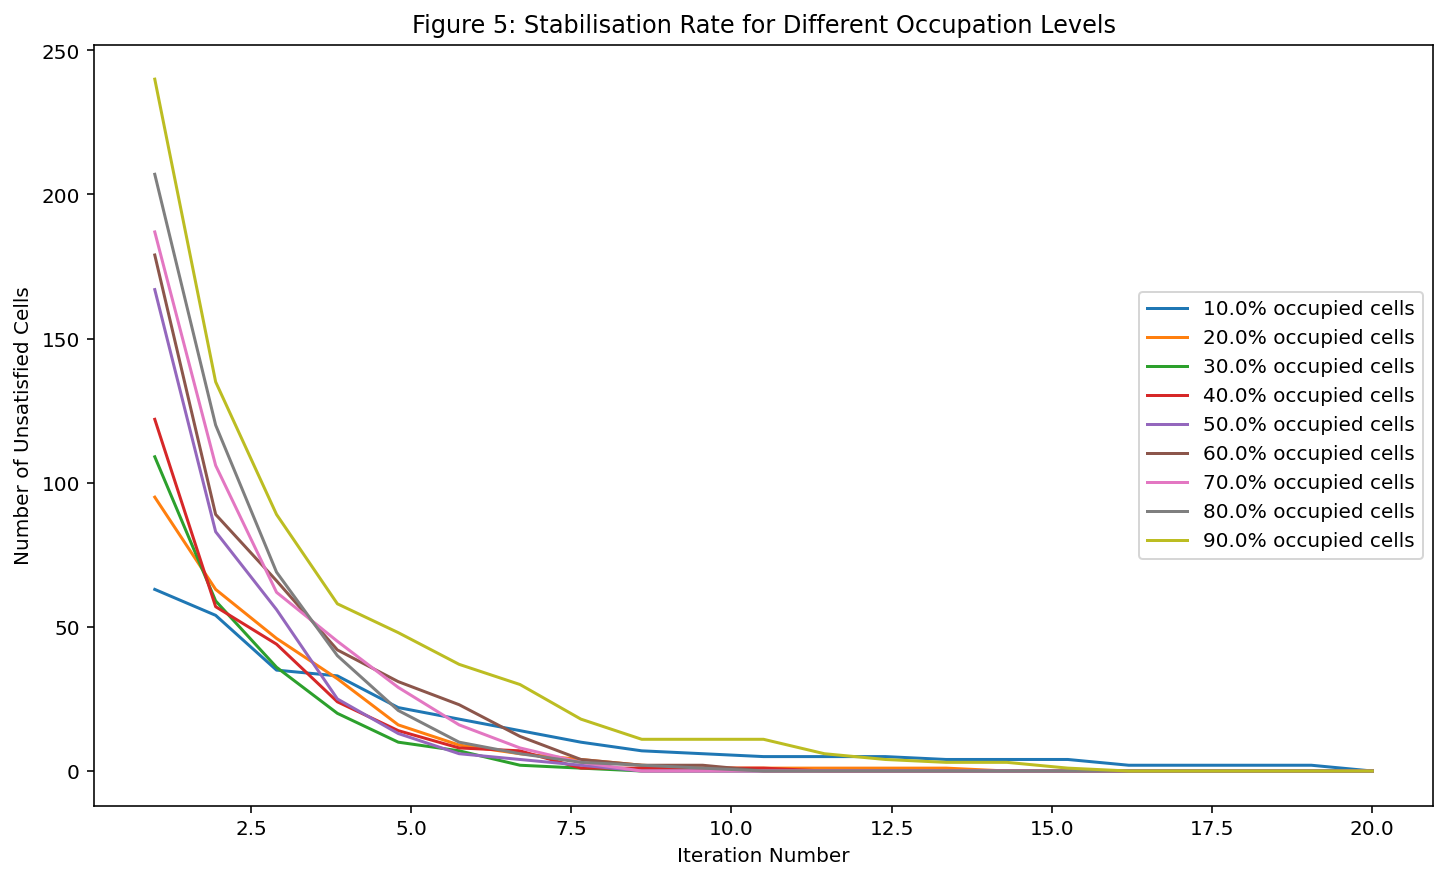

In [17]:
#Now looking at the effect of changing the percentage of occupied cells with holding f value at 0.4 and grid size at 30x30
t= np.linspace(1,20, 21) #setup a linsapce for 20 iterations
diss_array = np.zeros(21) #setup a numpy array for 20 iterations
a = np.array([45,90,135,180,225, 270, 315, 360, 405]) #set the range to go over different percentages of occuption in the grid
for N in a: #run over the values of a
    percentage = (N/900)*100*2 #assign the right percentage corresponding to the value in the array
    originalGrid= initialise_grid(30, N)
    grid = originalGrid
    diss_array[0] = number_dissatisfied_cells(grid, 0.4) #assign values into the dissatisfied array
    for i in range(1, 21): #run it for the right amount of iterations
        grid = advance(grid, 0.4)
        diss_array[i] = number_dissatisfied_cells(grid, 0.4)
    plt.plot(t, diss_array, label="{}% occupied cells".format(percentage)) #plot
    plt.title("Figure 5: Stabilisation Rate for Different Occupation Levels")
    plt.xlabel("Iteration Number")
    plt.ylabel("Number of Unsatisfied Cells")
    plt.legend(loc='center right')
plt.show()


This part looks at the effect of the initial cell distribution, and more specifically the percentage occupied by a single organism. Meaning that if the level is set at 90 %, 45% of the grid will be 1s, 45 % of the grid will be 2s, and 10% will be 0s. The grid size is set at 30 by 30  and the f value is set at 0.4. Here \(figure 5\), like in section 2, there are no real special trends to be seen. All the levels of occupation seem the be stabilising at some point. The only trend is that for a less occupied the grid, the more time it will take to stabilise. This is expected because as it is less occupied by organisms, there will be more 0 cells which do not count in the analysis. 

To conclude this report, although these results are random and should be analysed further with more rigorous statistical methods, some trends can be extracted from this initial analysis. The first one is that for higher values of f, the grid will take longer to stabilise; even though for 0.8 and 0.9, the grid typically never stabilises. Now for the effect of grid size and occupation level of 1s and 2s, it all follows the expected trend that the larger the grid the longer it takes to stabilise, and the less 1s and 2s, the longer it takes to stabilise. These two last trends did not have any unconventional values such as the 0.8 and 0.9 f value above. Further steps in this investigation could be to have an unequal amount of 1s and 2s in the grid and see how that affects the stabilisation rate. Also, there could be looked at having different shape grids and see how organisms behave the borders. 

